# Network Medicine

## Disease Module

In [21]:
import numpy as np
import pandas as pd

import networkx as nx

import seaborn as sns
import matplotlib.pylab as plt

import os

import sys
sys.path.append('scripts/')

import localization
import separation
from preprocessing import preprocess_disease

In [22]:
ppi_file = 'data/ppi.csv'
dga_file = "data/disease_gene.tsv"

dga, ppi = preprocess_disease(ppi_file, dga_file)

In [23]:
dmt = dga[dga.diseaseName == 'dementia']

In [24]:
dmt

,geneSymbol,diseaseName
35403,APP,dementia
35404,COL4A1,dementia
35405,CP,dementia
35406,CSF1R,dementia
35407,CST3,dementia
35408,DNMT1,dementia
35409,FUS,dementia
35410,GRN,dementia
35411,MAPT,dementia
35412,NOTCH3,dementia


In [25]:
dmt_genes = list(dmt.geneSymbol.unique())

In [26]:
len(dmt_genes)

17

In [27]:
gppi = nx.from_pandas_edgelist(ppi, 'Symbol_A', 'Symbol_B')

# Removing self loops
sl = nx.selfloop_edges(gppi)
gppi.remove_edges_from(sl)

In [28]:
# Find dementia genes in ppi
dmt_genes_in_ppi = list()

# Extract the disease module for Dementia
for n in list(gppi.nodes):
    if n in dmt_genes:
        dmt_genes_in_ppi.append(n)

In [29]:
dmt_genes_in_ppi

['GRN',
 'HTRA1',
 'DNMT1',
 'APP',
 'PSEN2',
 'SLC6A3',
 'CSF1R',
 'PRNP',
 'FUS',
 'COL4A1',
 'MAPT',
 'NOTCH3',
 'CP',
 'CST3',
 'TYROBP',
 'SLC9A8',
 'TREM2']

In [30]:
# Extract the subgraph (disease module) for Dementia
dmt_module = gppi.subgraph(dmt_genes_in_ppi).copy()

In [31]:
# Calculate the number of nodes (genes) in the Dementia disease module
num_nodes = dmt_module.number_of_nodes()
print("Number of nodes (genes) in the Dementia disease module:", num_nodes)

# Calculate the number of edges (interactions) in the Dementia disease module
num_edges = dmt_module.number_of_edges()
print("Number of edges (interactions) in the Dementia disease module:", num_edges)

Number of nodes (genes) in the Dementia disease module: 17
Number of edges (interactions) in the Dementia disease module: 7


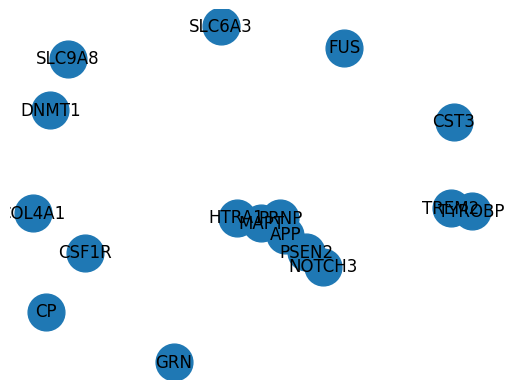

In [32]:
pos = nx.spring_layout(dmt_module)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(dmt_module, pos, node_size=700)

# Edges
nx.draw_networkx_edges(dmt_module, pos, width=1.0, alpha=0.5)

# Labels
nx.draw_networkx_labels(dmt_module, pos, font_size=12)

# plt.title('Dementia Disease Module Network')
plt.axis('off')
plt.show()

In [33]:
# Use the localization module for LCC and random comparison
lcc = localization.get_lcc(gppi, dmt_genes_in_ppi)
sig_dict = localization.get_random_comparison(gppi, dmt_genes_in_ppi, 1000)

In [34]:
random_lcc = sig_dict['LCC_list']

print('Mean: ',sig_dict['mean'])

print('Std: ',sig_dict['std'])

print('z-score: ',sig_dict['z_score'])

print('p-value: ',sig_dict['p_value'])

Mean:  1.237
Std:  0.5146173335596071
z-score:  9.255420852333787
p-value:  0.0


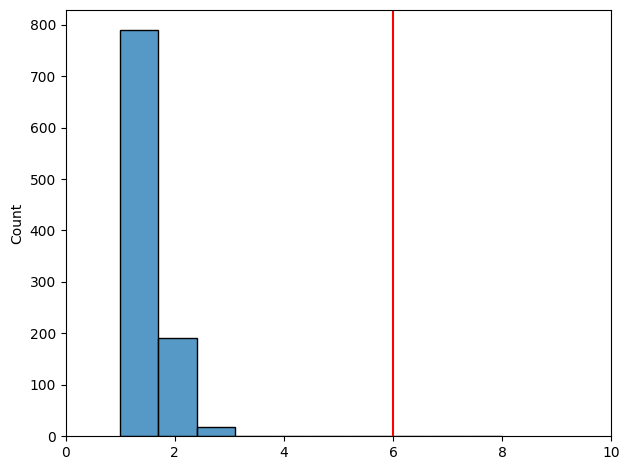

In [35]:
sns.histplot(data=random_lcc,
             bins=10)

plt.axvline(len(lcc), color='r')

plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [37]:
sig_dp_dict = localization.get_random_comparison(gppi, dmt_genes_in_ppi, 1000, degree_preserving=True)

In [38]:
random_dp_lcc = sig_dp_dict['LCC_list']

print('Mean: ',sig_dp_dict['mean'])

print('Std: ',sig_dp_dict['std'])

print('z-score: ',sig_dp_dict['z_score'])

print('p-value: ',sig_dp_dict['p_value'])

Mean:  2.202
Std:  0.9247680790338733
z-score:  4.106975668935133
p-value:  4.00873438266558e-05


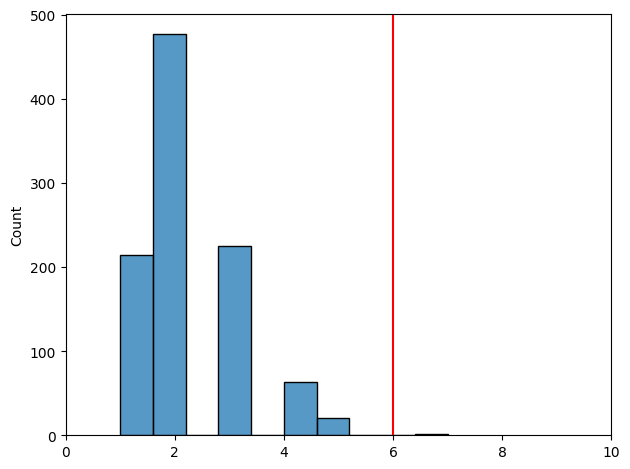

In [39]:
sns.histplot(data=random_dp_lcc,
             bins=10)

plt.axvline(len(lcc), color='r')

plt.xlim(0, 10)
plt.tight_layout()
plt.show()

## Disease Separation

In [43]:
import utils

In [44]:
dementia_genes = dga[dga['diseaseName'] == 'dementia']['geneSymbol'].unique()
print(dementia_genes)

['APP' 'COL4A1' 'CP' 'CSF1R' 'CST3' 'DNMT1' 'FUS' 'GRN' 'MAPT' 'NOTCH3'
 'PRNP' 'HTRA1' 'PSEN2' 'SLC6A3' 'TYROBP' 'SLC9A8' 'TREM2']


In [45]:
disease1_genes = dga[dga['diseaseName'] == 'schizophrenia']['geneSymbol'].unique()
disease2_genes = dga[dga['diseaseName'] == 'hypercholesterolemia']['geneSymbol'].unique()
print(disease1_genes)
print(disease2_genes)


['A1BG' 'ABCA1' 'ACHE' 'ACP1' 'ACTB' 'ADARB1' 'ADCY7' 'ADCYAP1'
 'ADCYAP1R1' 'ADK' 'ADM' 'ADORA1' 'ADORA2A' 'ADRA1A' 'ADRA2A' 'ADSS2'
 'AGA' 'AGER' 'JAG1' 'AKT1' 'ALDH1A1' 'ALDH3A1' 'ALDH3B1' 'ALK' 'ALOX12'
 'ANK3' 'APBA2' 'APC' 'APOA4' 'APOD' 'APOE' 'APOH' 'FAS' 'AQP4' 'ARHGAP1'
 'ARVCF' 'ASAH1' 'ATF4' 'ATM' 'ATP2A2' 'AVP' 'AVPR1A' 'BAG1' 'CCND1'
 'BCL2' 'BCL9' 'BDNF' 'BID' 'BRCA1' 'BTC' 'KLF5' 'BTG1' 'C1QB' 'CACNA1B'
 'CACNA1C' 'CACNA1F' 'DDR1' 'CACNB2' 'CALB1' 'CAMK2B' 'CASP3' 'CASP4'
 'CAV1' 'CBS' 'CCK' 'CCKAR' 'CCNA2' 'CCND2' 'SEPTIN7' 'CDC25C' 'CDC42'
 'CDK5' 'CDKN1C' 'CETN1' 'CHAT' 'CHD4' 'CHEK1' 'CHGA' 'CHGB' 'CHI3L1'
 'CHRM1' 'CHRM2' 'CHRM4' 'CHRM5' 'CHRNA3' 'CHRNA4' 'CHRNA5' 'CHRNA7'
 'CHRNB2' 'CKB' 'CLU' 'CCR5' 'CNP' 'CNR1' 'CNR2' 'CNTF' 'COL3A1' 'COMT'
 'CP' 'CREB1' 'CRH' 'CRMP1' 'CRP' 'MAPK14' 'CSF2' 'CSF2RA' 'CSF2RB'
 'CSNK1E' 'NCAN' 'CTLA4' 'CTNNA2' 'CTNNB1' 'CTNND2' 'CTRL' 'CTSK' 'CYP1A2'
 'CYP2D6' 'CYP2E1' 'CYP3A4' 'CYP3A5' 'DAO' 'DBN1' 'DCC' 'ACE' 'DIO3'
 'DLG1' 'DLG2

In [46]:
dmt = utils.get_disease_module_info('dementia', dga, gppi, gppi)

Number of disease genes:  17
Number of disease genes in the PPI:  17
Number of disease genes in the LCC:  6


Full randomization
Mean:  1.271
Std:  0.6012977631756168
z-score:  7.864655898643073
p-value:  3.774758283725532e-15

Degree preserving randomization
Mean:  2.203
Std:  0.9087304330768283
z-score:  4.17835681715194
p-value:  2.936227534222624e-05 



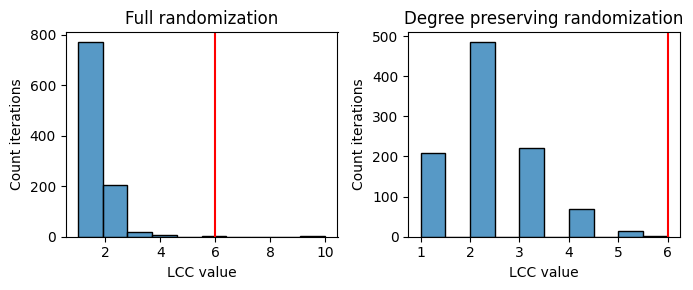

In [47]:
utils.plot_disease_module_info(gppi, dmt)

In [48]:
stzo = utils.get_disease_module_info('schizophrenia', dga, gppi, gppi)

Number of disease genes:  883
Number of disease genes in the PPI:  846
Number of disease genes in the LCC:  683


Full randomization
Mean:  413.118
Std:  34.0038832488291
z-score:  7.936799395089477
p-value:  1.9984014443252818e-15

Degree preserving randomization
Mean:  618.535
Std:  11.30879193371246
z-score:  5.700432051263093
p-value:  1.1950415990114038e-08 



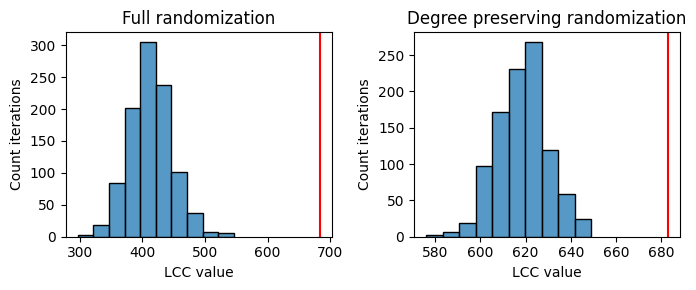

In [49]:
utils.plot_disease_module_info(gppi, stzo)

In [50]:
hchol = utils.get_disease_module_info('hypercholesterolemia', dga, gppi, gppi)

Number of disease genes:  39
Number of disease genes in the PPI:  39
Number of disease genes in the LCC:  19


Full randomization
Mean:  1.989
Std:  1.0746529672410532
z-score:  15.829296078409559
p-value:  0.0

Degree preserving randomization
Mean:  2.179
Std:  0.937528132911221
z-score:  17.941861592747387
p-value:  0.0 



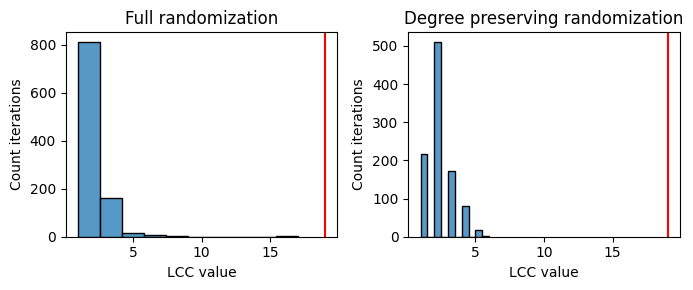

In [51]:
utils.plot_disease_module_info(gppi, hchol)

In [52]:
sab = separation.get_separation(gppi, dmt[2], stzo[2])
print(sab)

1.9245283018867925


In [53]:
sab = separation.get_separation(gppi, dmt[2], hchol[2])
print(sab)

1.84


## Drug Proximity

In [54]:
dt = pd.read_csv('data/drug_target.csv')

cleaned_dt = dt[dt.organism=='Humans'][['Gene_Target', 
                                        'Name']].drop_duplicates()

In [55]:
cleaned_dt[cleaned_dt.Gene_Target.isin(dmt[2])][['Name']].drop_duplicates()

,Name
3422,Lansoprazole
5027,Astemizole
5782,Deferoxamine
5896,Tetracycline
9298,Paclitaxel
9505,Docetaxel
9954,Aluminium
10633,Zinc
12613,Resveratrol
14312,Tromethamine


Lansoprazole
	Targets:  ['ATP4A' 'MAPT' 'CYP1A1' 'CYP1B1' 'CYP2C8' 'CYP2C9' 'CYP2C18' 'CYP2D6'
 'CYP3A4' 'CYP2C19' 'ABCG2' 'ABCB1' 'SLC22A8' 'SLC22A1' 'SLC22A2'
 'SLC22A3']
Proximity observed:  1.1666666666666667

Mean:  1.822
Std:  0.1381802365672377
z-score:  -4.742598142929448
p-value:  2.1099455325135352e-06


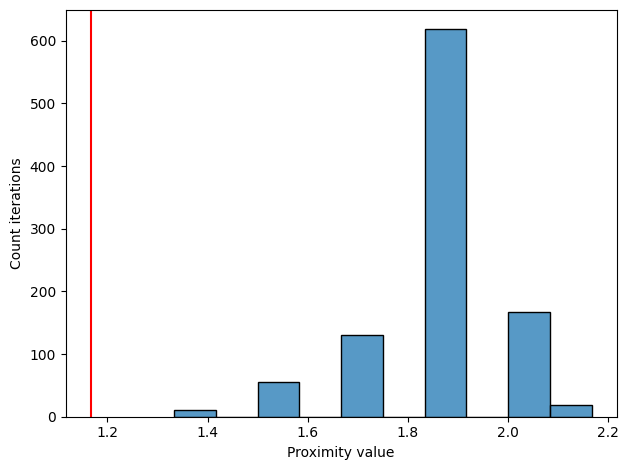

In [56]:
le_t = cleaned_dt[cleaned_dt.Name == 'Lansoprazole'].Gene_Target.unique()
print('Lansoprazole')
print('\tTargets: ',le_t)

utils.plot_proximity(gppi, 
               set(dmt[2]), 
               set(le_t), 
               1000)

Astemizole
	Targets:  ['HRH1' 'KCNH2' 'KCNH1' 'MAPT' 'CYP3A4' 'CYP3A5' 'CYP3A7' 'CYP2D6'
 'CYP2J2' 'ABCB1' 'ABCB11']
Proximity observed:  1.1666666666666667

Mean:  1.836333333333333
Std:  0.14583819039530688
z-score:  -4.59184706592613
p-value:  4.393402748936737e-06


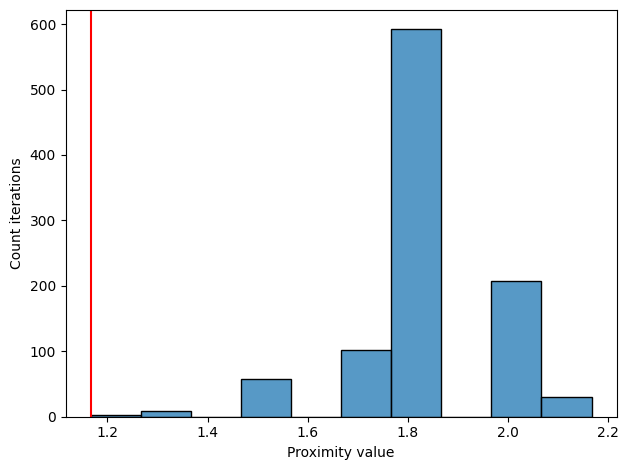

In [57]:
le_t = cleaned_dt[cleaned_dt.Name == 'Astemizole'].Gene_Target.unique()
print('Astemizole')
print('\tTargets: ',le_t)

utils.plot_proximity(gppi, 
               set(dmt[2]), 
               set(le_t), 
               1000)

Lepirudin
	Targets:  ['F2']
Proximity observed:  2.6666666666666665

Mean:  2.6353333333333335
Std:  0.15658295635931208
z-score:  0.20010692135248845
p-value:  0.8413969603885996


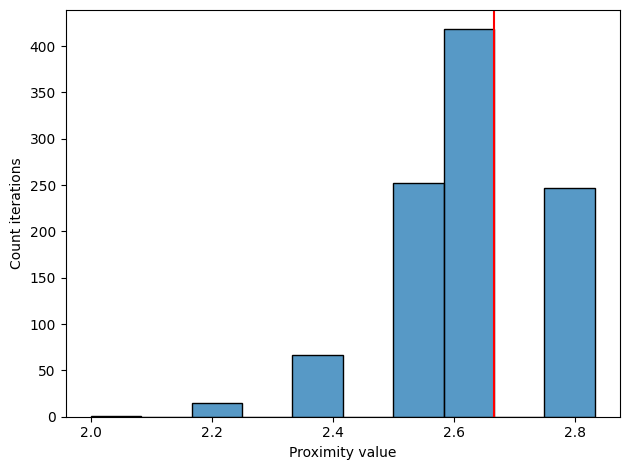

In [58]:
le_t = cleaned_dt[cleaned_dt.Name == 'Lepirudin'].Gene_Target.unique()
print('Lepirudin')
print('\tTargets: ',le_t)

utils.plot_proximity(gppi, 
               set(dmt[2]), 
               set(le_t), 
               1000)

Cetuximab
	Targets:  ['EGFR' 'FCGR3B' 'C1QA' 'C1QB' 'C1QC' 'FCGR3A' 'FCGR1A' 'FCGR2A']
Proximity observed:  1.6666666666666667

Mean:  1.7583333333333333
Std:  0.11468556045892511
z-score:  -0.7992869049935644
p-value:  0.42412407020110154


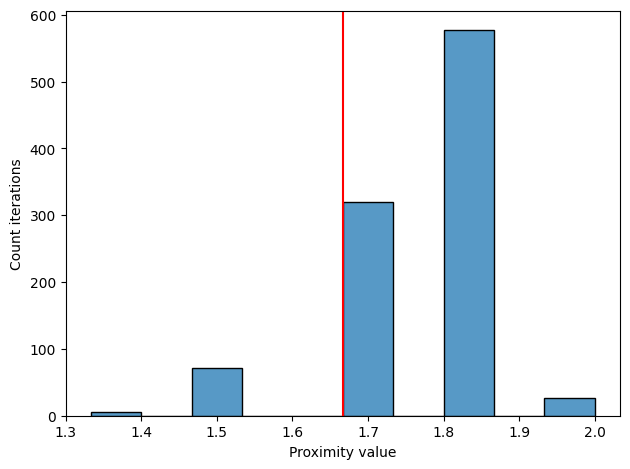

In [59]:
le_t = cleaned_dt[cleaned_dt.Name == 'Cetuximab'].Gene_Target.unique()
print('Cetuximab')
print('\tTargets: ',le_t)

utils.plot_proximity(gppi, 
               set(dmt[2]), 
               set(le_t), 
               1000)

Memantine
	Targets:  ['HTR3A' 'CHRNA7' 'DRD2' 'GRIN1' 'GABRA1' 'GLRA1' 'CYP2B6' 'CYP2A6'
 'CYP2C19' 'SLC22A2' 'SLC9A1' 'SLC22A4' 'SLC47A1']
Proximity observed:  2.0

Mean:  2.0265
Std:  0.09093938762836606
z-score:  -0.29140288593425734
p-value:  0.7707432076214948


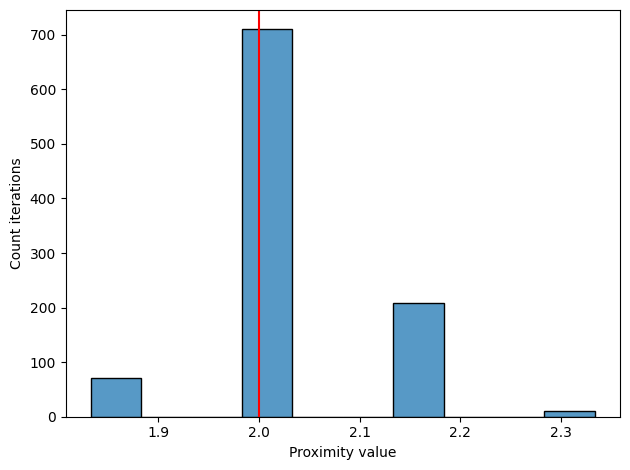

In [60]:
le_t = cleaned_dt[cleaned_dt.Name == 'Memantine'].Gene_Target.unique()
print('Memantine')
print('\tTargets: ',le_t)

utils.plot_proximity(gppi, 
               set(dmt[2]), 
               set(le_t), 
               1000)